# Weekly Project 2!

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LinearRegression

## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [2]:
df = pd.read_csv('RTADataset.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [4]:
df.shape

(12316, 32)

In [5]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [6]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [7]:
df.dtypes

,0
Time,object
Day_of_week,object
Age_band_of_driver,object
Sex_of_driver,object
Educational_level,object
Vehicle_driver_relation,object
Driving_experience,object
Type_of_vehicle,object
Owner_of_vehicle,object
Service_year_of_vehicle,object


In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928


In [10]:
df.isna().sum().sum()

20057

## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

In [11]:
# Handling Missing Values
for column in df.columns:
    if df[column].dtype in ['float64', 'int64']:
        df[column].fillna(df[column].mean(), inplace=True)
print(df.isnull().sum())

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [12]:
# Handling Missing Values
for column in df.columns:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)
print(df.isnull().sum())

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Service_year_of_vehicle        0
Defect_of_vehicle              0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Work_of_casuality              0
Fitness_of_casuality           0
Pedestrian_movement            0
Cause_of_a

In [13]:
df.isna().sum().sum()

0

In [14]:
# Normalization/Scaling
scaler = MinMaxScaler()
df[df.select_dtypes(include=['float64', 'int64']).columns] = scaler.fit_transform(df.select_dtypes(include=['float64', 'int64']))

print(df.head())

       Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0  17:02:00      Monday              18-30          Male   Above high school   
1  17:02:00      Monday              31-50          Male  Junior high school   
2  17:02:00      Monday              18-30          Male  Junior high school   
3   1:06:00      Sunday              18-30          Male  Junior high school   
4   1:06:00      Sunday              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr           Automobile   

  Owner_of_vehicle Service_year_of_vehicle  ... Vehicle_movement  \
0            Owner              Abov

In [15]:
# Label Encoding
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])
print(df.head())

   Time  Day_of_week  Age_band_of_driver  Sex_of_driver  Educational_level  \
0   420            1                   0              1                  0   
1   420            1                   1              1                  4   
2   420            1                   0              1                  4   
3   594            3                   0              1                  4   
4   594            3                   0              1                  4   

   Vehicle_driver_relation  Driving_experience  Type_of_vehicle  \
0                        0                   0                0   
1                        0                   3               11   
2                        0                   0                5   
3                        0                   2               11   
4                        0                   1                0   

   Owner_of_vehicle  Service_year_of_vehicle  ...  Vehicle_movement  \
0                 3                        3  ...        

In [16]:
# One-Hot Encoding
df = pd.get_dummies(df, columns=df.select_dtypes(include=['object']).columns, drop_first=True)

print(df.head())

   Time  Day_of_week  Age_band_of_driver  Sex_of_driver  Educational_level  \
0   420            1                   0              1                  0   
1   420            1                   1              1                  4   
2   420            1                   0              1                  4   
3   594            3                   0              1                  4   
4   594            3                   0              1                  4   

   Vehicle_driver_relation  Driving_experience  Type_of_vehicle  \
0                        0                   0                0   
1                        0                   3               11   
2                        0                   0                5   
3                        0                   2               11   
4                        0                   1                0   

   Owner_of_vehicle  Service_year_of_vehicle  ...  Vehicle_movement  \
0                 3                        3  ...        

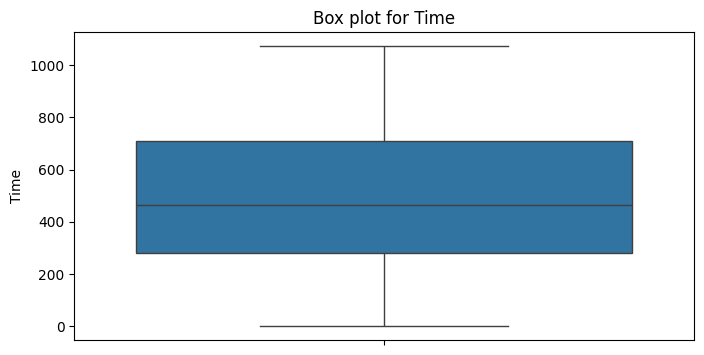

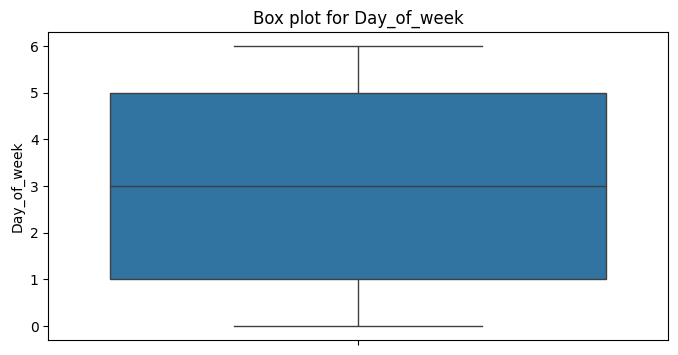

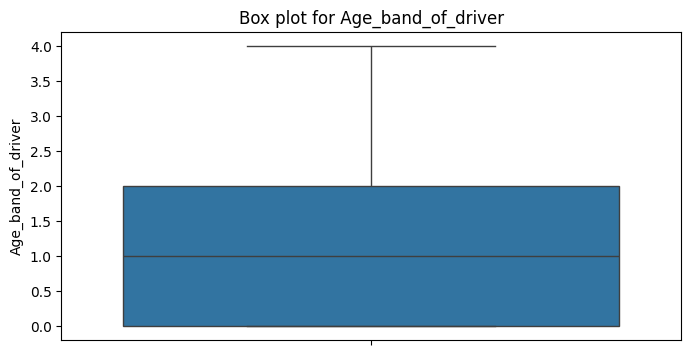

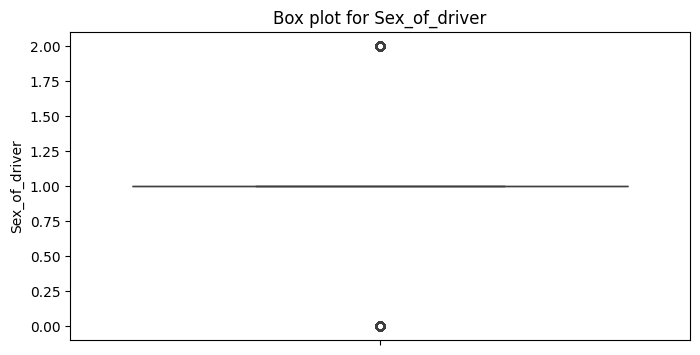

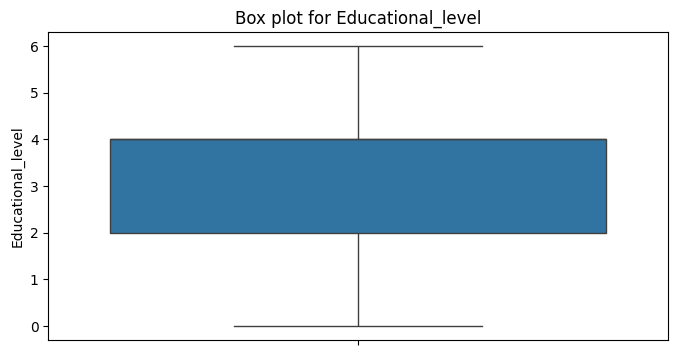

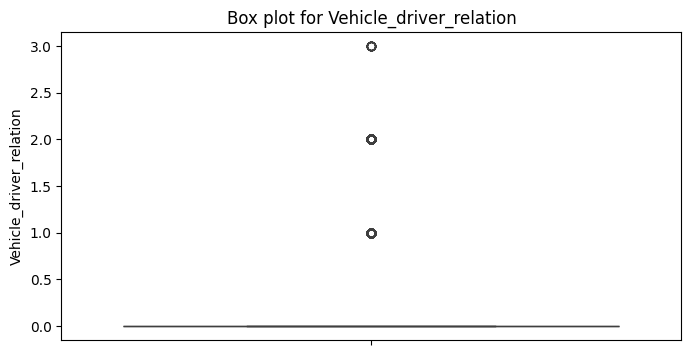

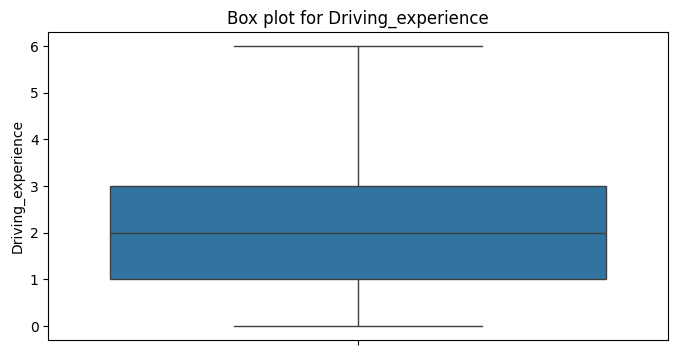

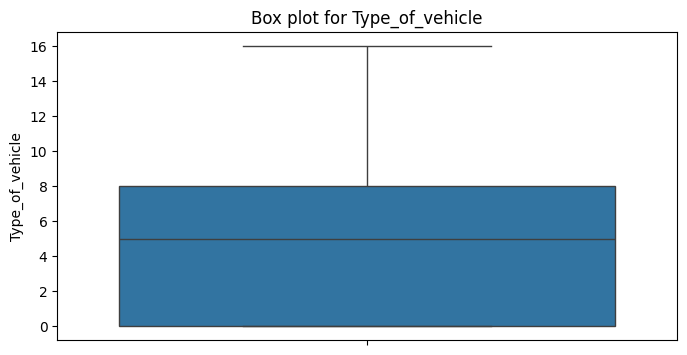

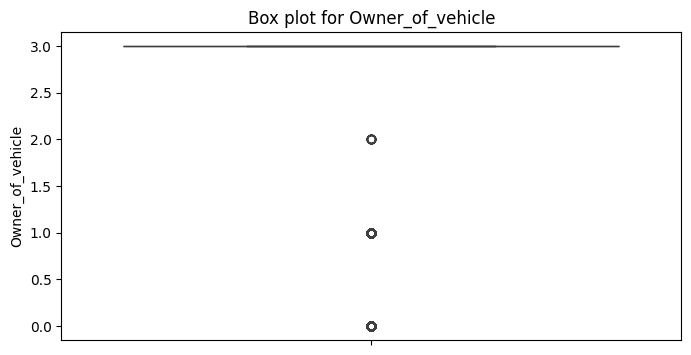

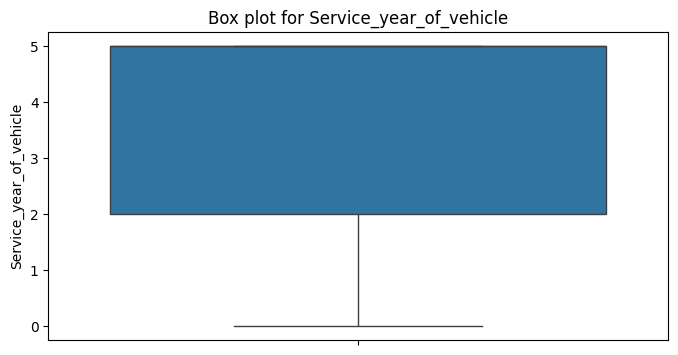

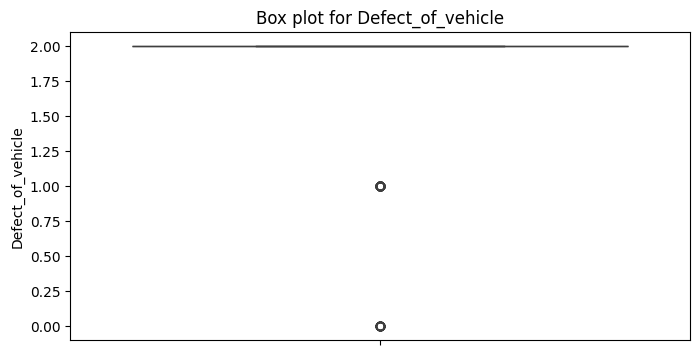

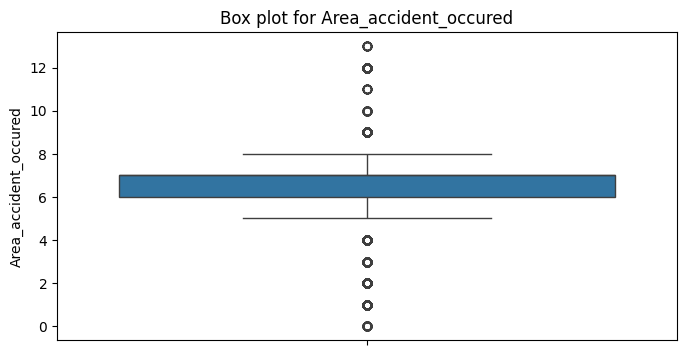

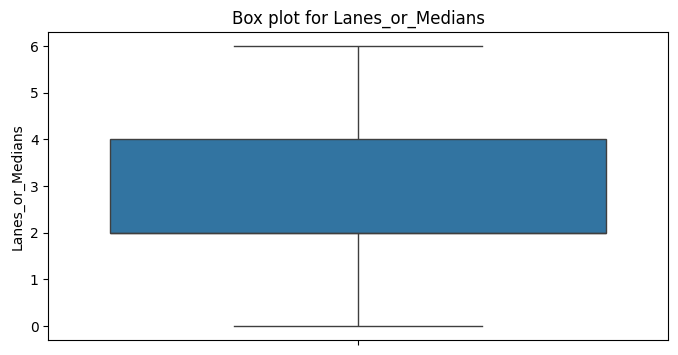

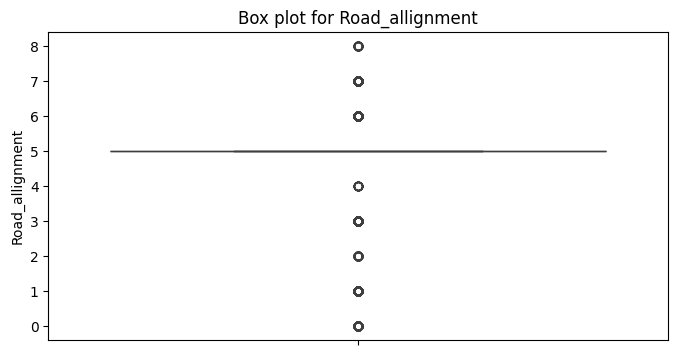

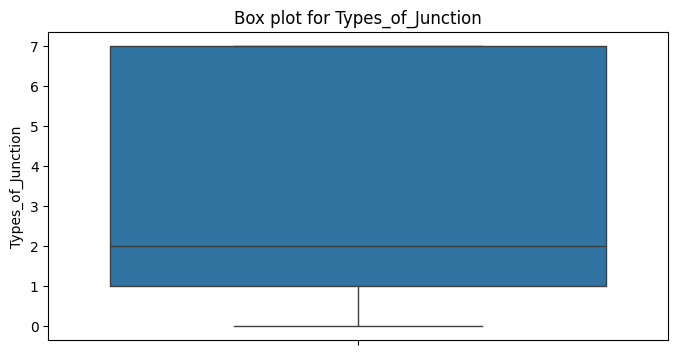

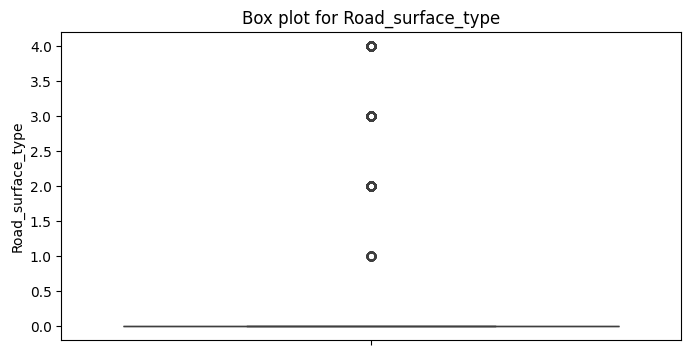

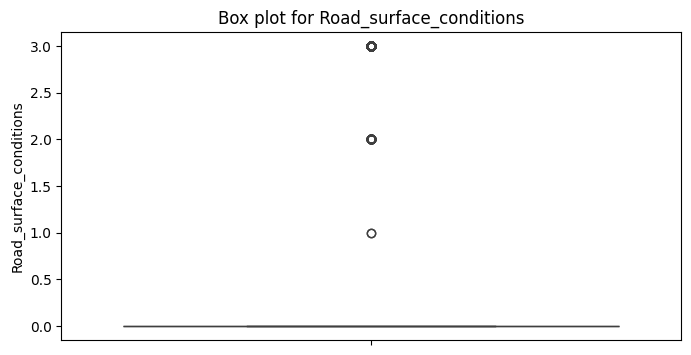

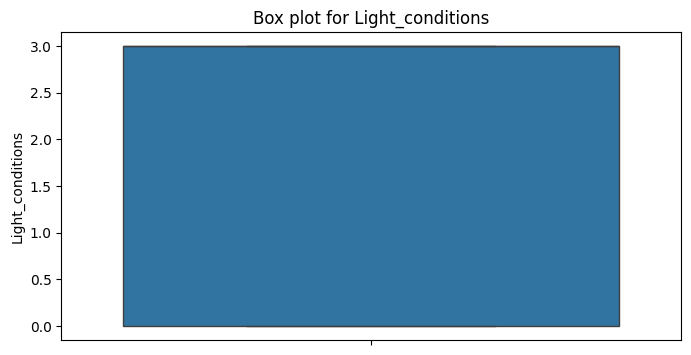

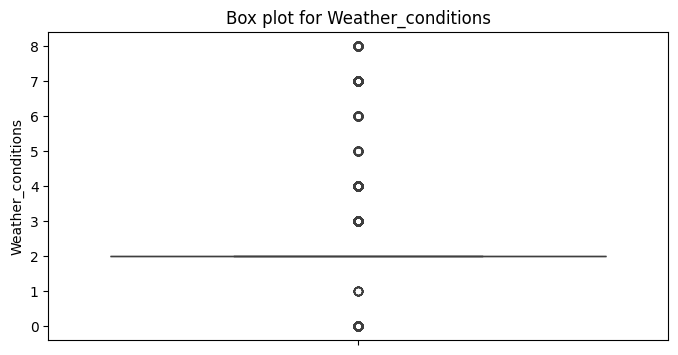

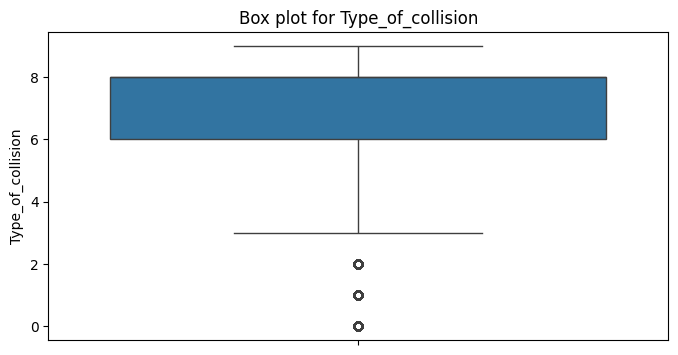

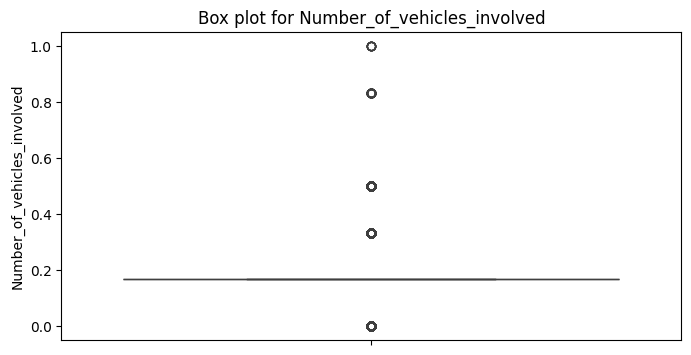

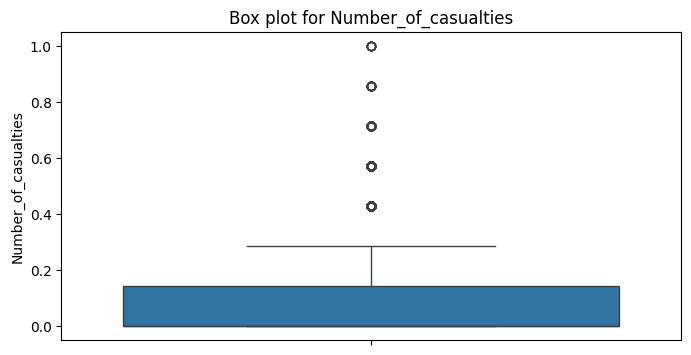

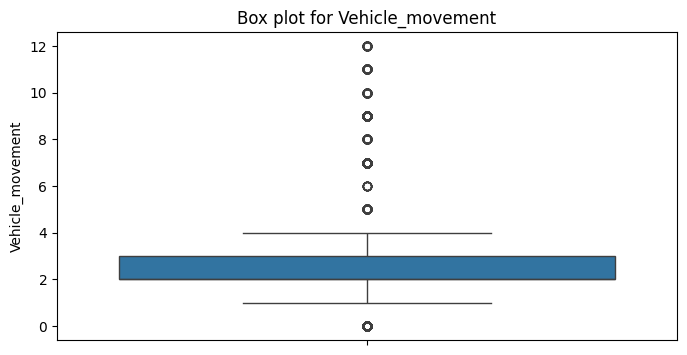

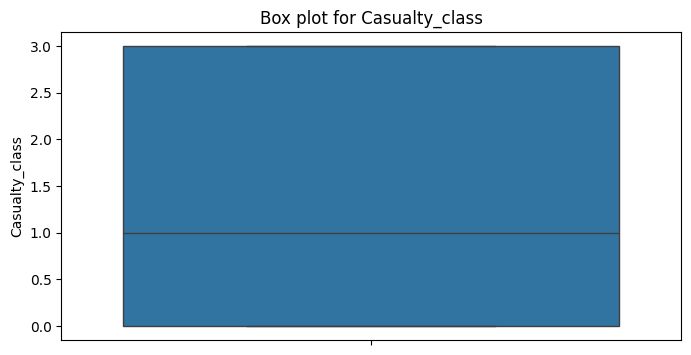

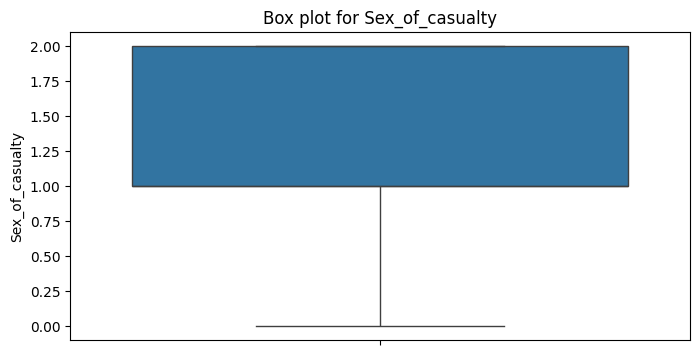

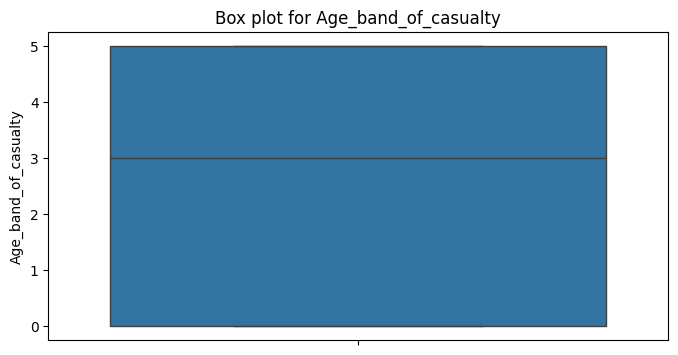

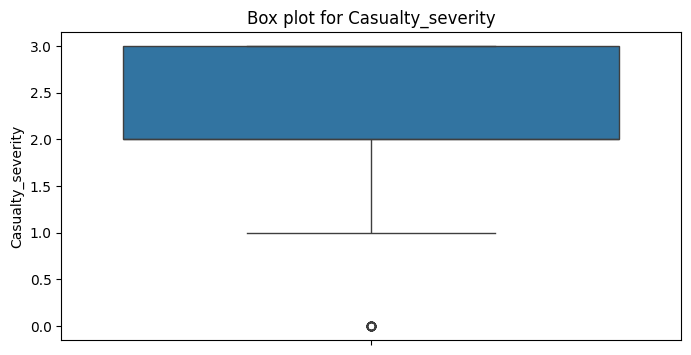

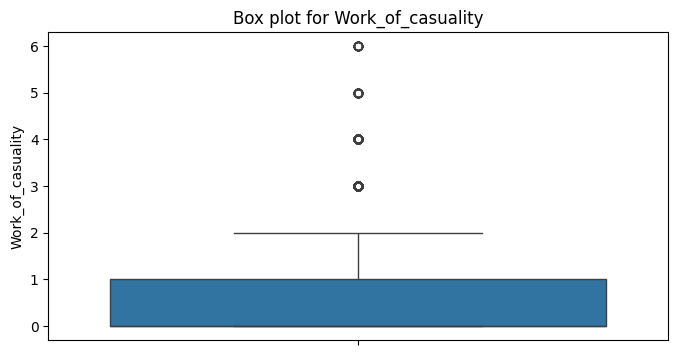

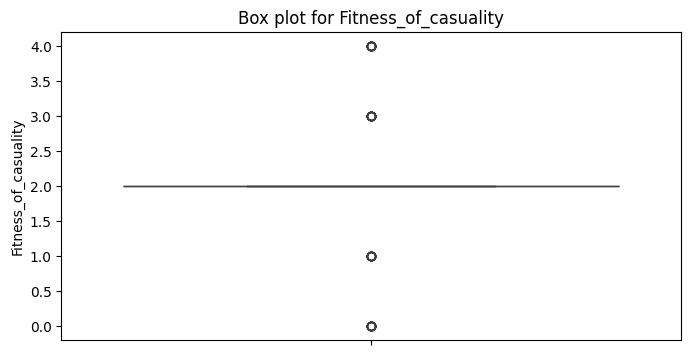

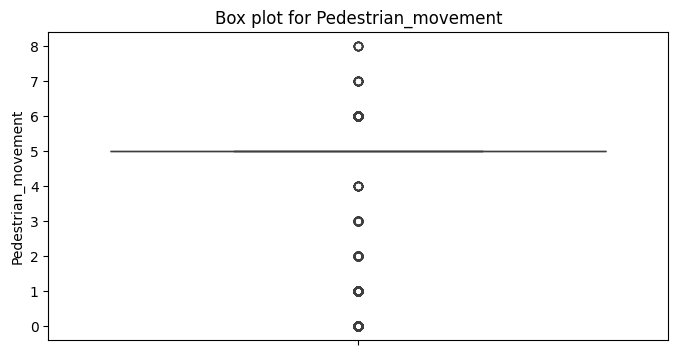

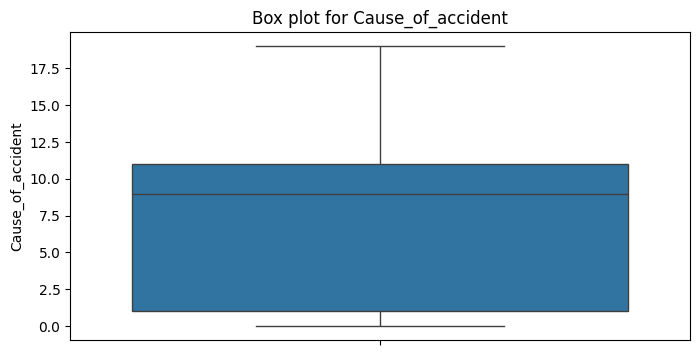

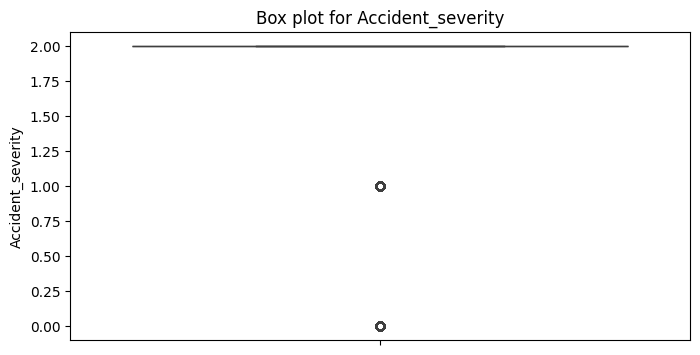

In [17]:
# Detection and Treatment of Outliers
for column in df.select_dtypes(include=['float64', 'int64']).columns:
  plt.figure(figsize=(8,4))
  sns.boxplot(df[column])
  plt.title(f'Box plot for {column}')
  plt.show()

In [18]:
# cap, trim, or use robust methods to reduce the effect of outliers


In [19]:
# Feature Engineering
df['vehicles_and_casualties_sum'] = df['Number_of_vehicles_involved'] + df['Number_of_casualties']

print(df[['Number_of_vehicles_involved', 'Number_of_casualties', 'vehicles_and_casualties_sum']].head())


   Number_of_vehicles_involved  Number_of_casualties  \
0                     0.166667              0.142857   
1                     0.166667              0.142857   
2                     0.166667              0.142857   
3                     0.166667              0.142857   
4                     0.166667              0.142857   

   vehicles_and_casualties_sum  
0                     0.309524  
1                     0.309524  
2                     0.309524  
3                     0.309524  
4                     0.309524  


In [20]:
# Feature Engineering
df['vehicle_service_diff'] = df['Service_year_of_vehicle'] - df['Number_of_vehicles_involved']

print(df[['Service_year_of_vehicle', 'Number_of_vehicles_involved', 'vehicle_service_diff']].head())


   Service_year_of_vehicle  Number_of_vehicles_involved  vehicle_service_diff
0                        3                     0.166667              2.833333
1                        2                     0.166667              1.833333
2                        5                     0.166667              4.833333
3                        5                     0.166667              4.833333
4                        2                     0.166667              1.833333


In [21]:
# Feature Engineering
df['vehicles_service_interaction'] = df['Number_of_vehicles_involved'] * df['Service_year_of_vehicle']

print(df[['Number_of_vehicles_involved', 'Service_year_of_vehicle', 'vehicles_service_interaction']].head())


   Number_of_vehicles_involved  Service_year_of_vehicle  \
0                     0.166667                        3   
1                     0.166667                        2   
2                     0.166667                        5   
3                     0.166667                        5   
4                     0.166667                        2   

   vehicles_service_interaction  
0                      0.500000  
1                      0.333333  
2                      0.833333  
3                      0.833333  
4                      0.333333  


## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

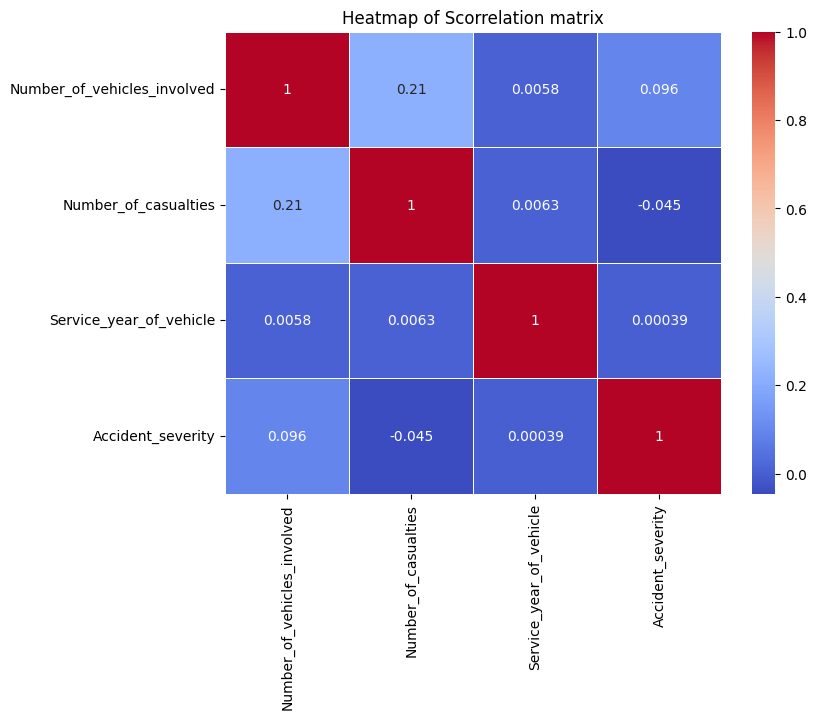

In [22]:
# Heatmap of Correlation Matrix
features = df[['Number_of_vehicles_involved', 'Number_of_casualties', 'Service_year_of_vehicle', 'Accident_severity']]
correlation_matrix = features.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Scorrelation matrix')
plt.show()

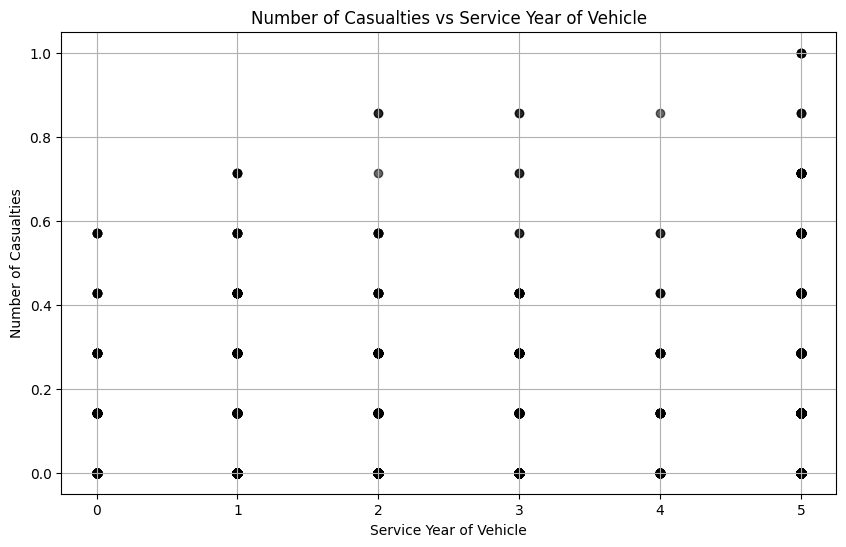

In [23]:
# Line plot
X = df[['Service_year_of_vehicle']].values
y = df['Number_of_casualties'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color="black", label="Actual data", alpha=0.6)
plt.xlabel('Service Year of Vehicle')
plt.ylabel('Number of Casualties')
plt.title('Number of Casualties vs Service Year of Vehicle')
plt.grid(True)
plt.show()

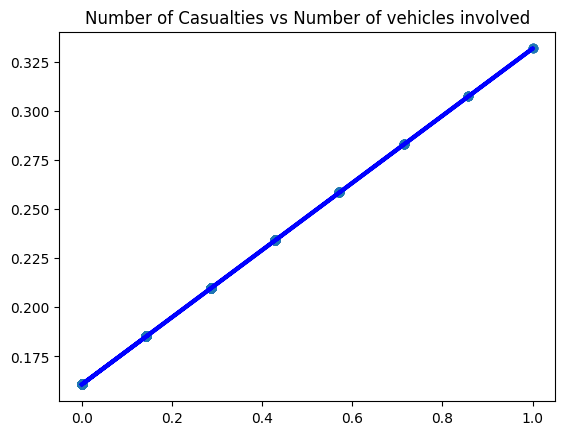

In [24]:
# Scatter plot
X = df[['Number_of_casualties']].values
y = df['Number_of_vehicles_involved'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


plt.scatter(X_test, y_pred)
plt.plot(X_test, y_pred, color="blue", linewidth=3)
plt.title('Number of Casualties vs Number of vehicles involved')
plt.show()

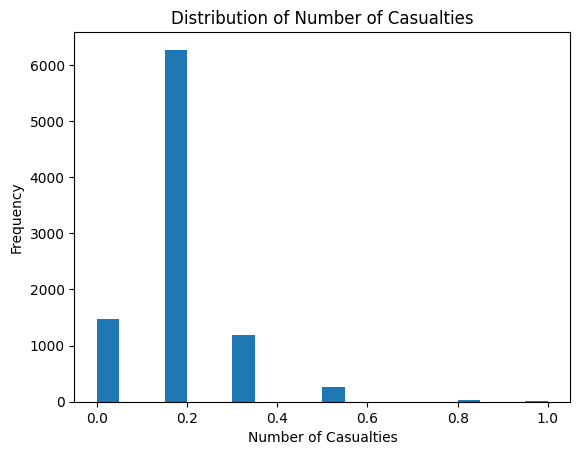

In [25]:
# Histogram
X = df[['Number_of_casualties']].values
y = df['Number_of_vehicles_involved'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plt.hist(y_train, bins=20)
plt.title('Distribution of Number of Casualties')
plt.xlabel('Number of Casualties')
plt.ylabel('Frequency')
plt.show()

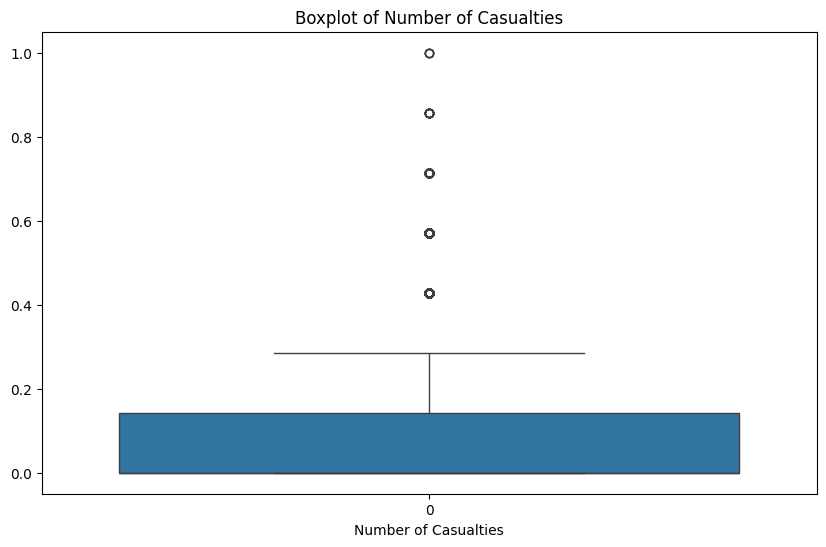

In [26]:
# Boxplot
X = df[['Number_of_casualties']].values
y = df['Number_of_vehicles_involved'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))
sns.boxplot(X_train)
plt.title('Boxplot of Number of Casualties')
plt.xlabel('Number of Casualties')
plt.show()

## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

In [27]:
correlation_with_severity = df.corr()['Accident_severity'].sort_values(ascending=False)
print(correlation_with_severity)

Accident_severity               1.000000
Number_of_vehicles_involved     0.096023
vehicles_service_interaction    0.069902
Type_of_collision               0.025867
Light_conditions                0.025741
Age_band_of_casualty            0.025510
vehicles_and_casualties_sum     0.022242
Casualty_class                  0.014075
Age_band_of_driver              0.013185
Pedestrian_movement             0.013082
Weather_conditions              0.010172
Cause_of_accident               0.008040
Casualty_severity               0.006531
Sex_of_driver                   0.004977
Road_surface_conditions         0.004579
Sex_of_casualty                 0.003708
Work_of_casuality               0.003428
Defect_of_vehicle               0.001889
Driving_experience              0.000509
Service_year_of_vehicle         0.000393
Educational_level              -0.001471
Day_of_week                    -0.002730
Type_of_vehicle                -0.003709
Road_surface_type              -0.004510
vehicle_service_

In [28]:
# Train-Test Split

features = [
    'Number_of_vehicles_involved',
    'Number_of_casualties',
    'Service_year_of_vehicle']
X = df[features]
y = df['Accident_severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print(X_train.shape)
print(X_test.shape)
print("Training set target distribution:\n", y_train.value_counts(normalize=True))
print("Testing set target distribution:\n", y_test.value_counts(normalize=True))

(9237, 3)
(3079, 3)
Training set target distribution:
 Accident_severity
2    0.849302
1    0.138573
0    0.012125
Name: proportion, dtype: float64
Testing set target distribution:
 Accident_severity
2    0.834687
1    0.150373
0    0.014940
Name: proportion, dtype: float64


## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

#### Logistic Regression

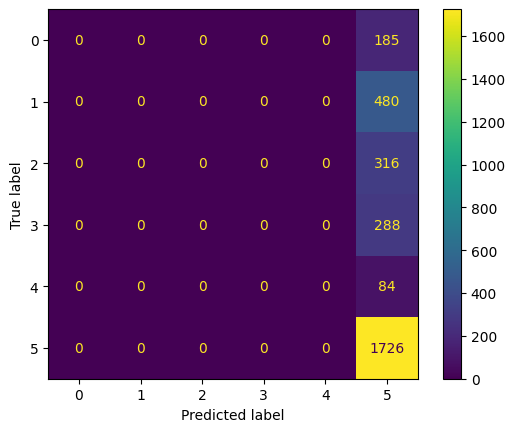

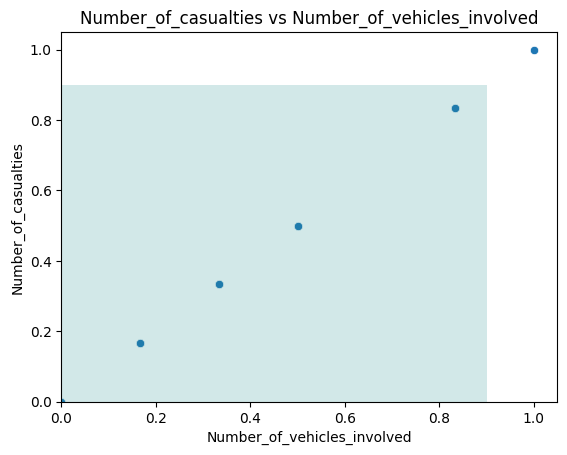

In [79]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test)
plt.show()
X = df[['Number_of_vehicles_involved']].values
y = df['Service_year_of_vehicle'].values


X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)

sns.scatterplot(x=X_test[:,0],y=X_test[:,0])
plt.xlabel('Number_of_vehicles_involved')
plt.ylabel('Number_of_casualties')
plt.title('Number_of_casualties vs Number_of_vehicles_involved')

xx, yy = np.meshgrid(np.arange(X[:, 0].min(), X[:, 0].max(), 0.1),
                     np.arange(X[:, 0].min(), X[:, 0].max(), 0.1))
Z = logreg.predict(np.c_[xx.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2)

plt.show()


In [32]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.5605716141604417
Classification:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       185
           1       0.00      0.00      0.00       480
           2       0.00      0.00      0.00       316
           3       0.00      0.00      0.00       288
           4       0.00      0.00      0.00        84
           5       0.56      1.00      0.72      1726

    accuracy                           0.56      3079
   macro avg       0.09      0.17      0.12      3079
weighted avg       0.31      0.56      0.40      3079

Confusion Matrix:
 [[   0    0    0    0    0  185]
 [   0    0    0    0    0  480]
 [   0    0    0    0    0  316]
 [   0    0    0    0    0  288]
 [   0    0    0    0    0   84]
 [   0    0    0    0    0 1726]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Decision Tree Classifier

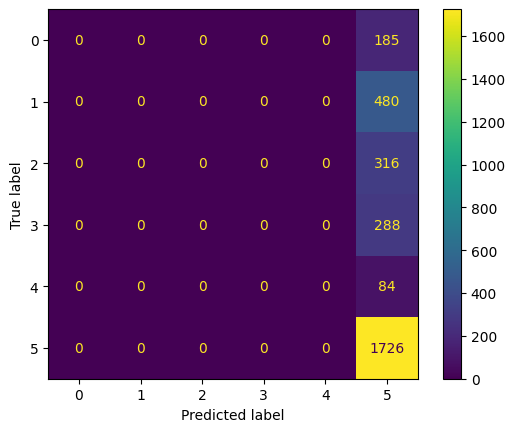

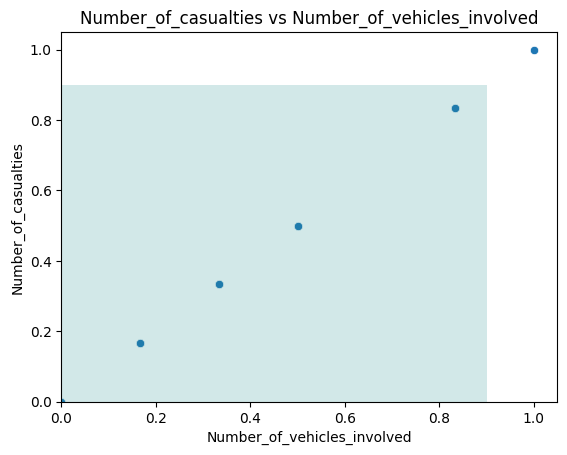

In [78]:
dtree = DecisionTreeClassifier(random_state=42)

dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)
ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test)
plt.show()
X = df[['Number_of_vehicles_involved']].values
y = df['Service_year_of_vehicle'].values

sns.scatterplot(x=X_test[:,0],y=X_test[:,0])
plt.xlabel('Number_of_vehicles_involved')
plt.ylabel('Number_of_casualties')
plt.title('Number_of_casualties vs Number_of_vehicles_involved')

xx, yy = np.meshgrid(np.arange(X[:, 0].min(), X[:, 0].max(), 0.1),
                     np.arange(X[:, 0].min(), X[:, 0].max(), 0.1))
Z = dtree.predict(np.c_[xx.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2)
plt.show()

In [34]:
dtree = DecisionTreeClassifier(random_state=42)

dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.5605716141604417
Classification:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       185
           1       0.00      0.00      0.00       480
           2       0.00      0.00      0.00       316
           3       0.00      0.00      0.00       288
           4       0.00      0.00      0.00        84
           5       0.56      1.00      0.72      1726

    accuracy                           0.56      3079
   macro avg       0.09      0.17      0.12      3079
weighted avg       0.31      0.56      0.40      3079

Confusion Matrix:
 [[   0    0    0    0    0  185]
 [   0    0    0    0    0  480]
 [   0    0    0    0    0  316]
 [   0    0    0    0    0  288]
 [   0    0    0    0    0   84]
 [   0    0    0    0    0 1726]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Support Vector Machine (SVM)

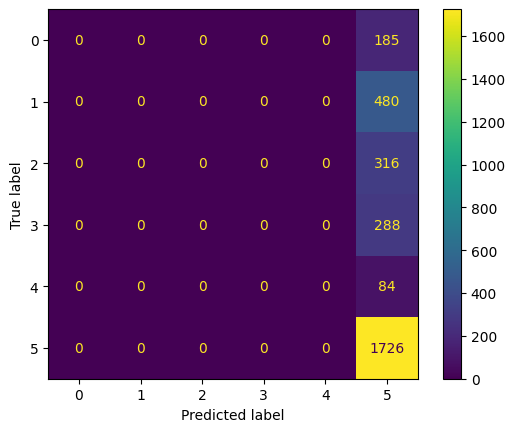

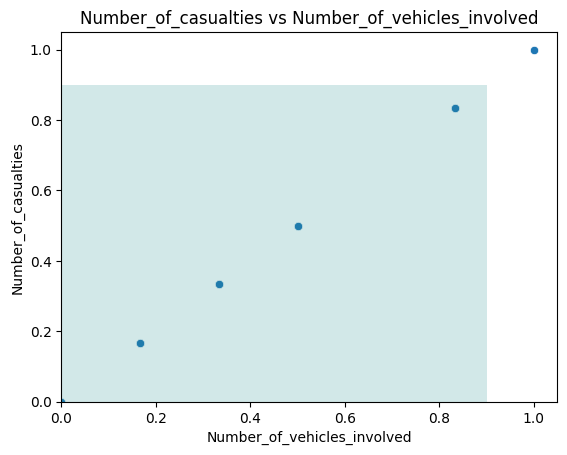

In [77]:
svm = SVC(random_state=42)

svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test)
plt.show()
X = df[['Number_of_vehicles_involved']].values
y = df['Service_year_of_vehicle'].values

sns.scatterplot(x=X_test[:,0],y=X_test[:,0])
plt.xlabel('Number_of_vehicles_involved')
plt.ylabel('Number_of_casualties')
plt.title('Number_of_casualties vs Number_of_vehicles_involved')

xx, yy = np.meshgrid(np.arange(X[:, 0].min(), X[:, 0].max(), 0.1),
                     np.arange(X[:, 0].min(), X[:, 0].max(), 0.1))
Z = svm.predict(np.c_[xx.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2)
plt.show()

In [37]:
svm = SVC(random_state=42)

svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.5605716141604417
Classification:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       185
           1       0.00      0.00      0.00       480
           2       0.00      0.00      0.00       316
           3       0.00      0.00      0.00       288
           4       0.00      0.00      0.00        84
           5       0.56      1.00      0.72      1726

    accuracy                           0.56      3079
   macro avg       0.09      0.17      0.12      3079
weighted avg       0.31      0.56      0.40      3079

Confusion Matrix:
 [[   0    0    0    0    0  185]
 [   0    0    0    0    0  480]
 [   0    0    0    0    0  316]
 [   0    0    0    0    0  288]
 [   0    0    0    0    0   84]
 [   0    0    0    0    0 1726]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### K-Neighbors Classifier

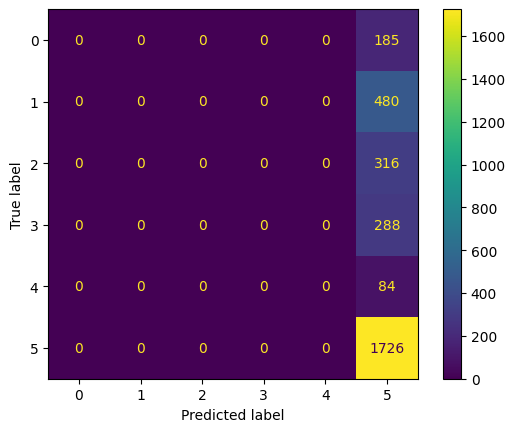

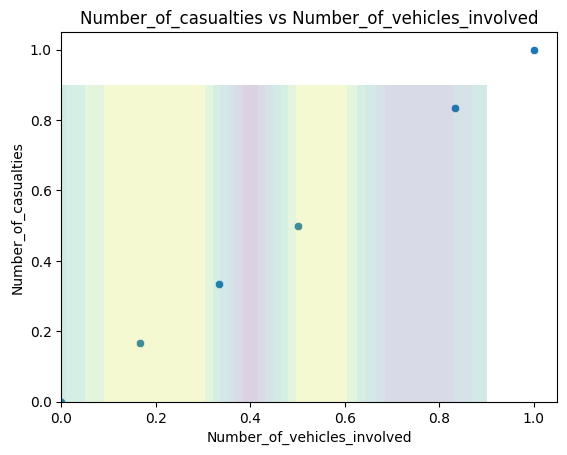

In [75]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test)
plt.show()
X = df[['Number_of_vehicles_involved']].values
y = df['Service_year_of_vehicle'].values

sns.scatterplot(x=X_test[:,0],y=X_test[:,0])
plt.xlabel('Number_of_vehicles_involved')
plt.ylabel('Number_of_casualties')
plt.title('Number_of_casualties vs Number_of_vehicles_involved')

xx, yy = np.meshgrid(np.arange(X[:, 0].min(), X[:, 0].max(), 0.1),
                     np.arange(X[:, 0].min(), X[:, 0].max(), 0.1))
Z = knn.predict(np.c_[xx.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2)
plt.show()

In [39]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("K-Neighbors Classifier Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

K-Neighbors Classifier Accuracy: 0.4754790516401429
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       185
           1       0.00      0.00      0.00       480
           2       0.00      0.00      0.00       316
           3       0.08      0.14      0.10       288
           4       0.00      0.00      0.00        84
           5       0.56      0.82      0.66      1726

    accuracy                           0.48      3079
   macro avg       0.11      0.16      0.13      3079
weighted avg       0.32      0.48      0.38      3079

Confusion Matrix:
 [[   0    1    0   27    0  157]
 [   0    0    0   78    0  402]
 [   0    0    0   56    0  260]
 [   0    0    0   41    0  247]
 [   0    0    0   17    0   67]
 [   0    6    0  297    0 1423]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

In [54]:
# Logistic Regression
cm_logreg = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for Logistic Regression:\n", cm_logreg)
print()
accuracy_logreg = accuracy_score(y_test, y_pred)
print(accuracy_logreg)
print()
precision_logreg = precision_score(y_test, y_pred, average='weighted')
recall_logreg = recall_score(y_test, y_pred, average='weighted')
print("Precision for Logistic Regression:", precision_logreg)
print("Recall for Logistic Regression:", recall_logreg)
print()
f1_logreg = f1_score(y_test, y_pred, average='weighted')
print(f1_logreg)

Confusion Matrix for Logistic Regression:
 [[   0    1    0   27    0  157]
 [   0    0    0   78    0  402]
 [   0    0    0   56    0  260]
 [   0    0    0   41    0  247]
 [   0    0    0   17    0   67]
 [   0    6    0  297    0 1423]]

0.4754790516401429

Precision for Logistic Regression: 0.3195188150098622
Recall for Logistic Regression: 0.4754790516401429

0.3821196550310931


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
# Decision Tree Classifier
dtree = DecisionTreeClassifier()

dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)
cm_dtree = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for Decision Tree Classifier:\n", cm_dtree)
print()
accuracy_dtree = accuracy_score(y_test, y_pred)
print(accuracy_dtree)
print()
precision_dtree = precision_score(y_test, y_pred, average='weighted')
recall_dtree = recall_score(y_test, y_pred, average='weighted')
print("Precision for Decision Tree Classifier:", precision_dtree)
print("Recall for Decision Tree Classifier:", recall_dtree)
print()
f1_dtree = f1_score(y_test, y_pred, average='weighted')
print(f1_dtree)

Confusion Matrix for Decision Tree Classifier:
 [[   0    0    0    0    0  185]
 [   0    0    0    0    0  480]
 [   0    0    0    0    0  316]
 [   0    0    0    0    0  288]
 [   0    0    0    0    0   84]
 [   0    0    0    0    0 1726]]

0.5605716141604417

Precision for Decision Tree Classifier: 0.3142405346024431
Recall for Decision Tree Classifier: 0.5605716141604417

0.4027249140649


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
# K-Neighbors Classifier
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

cm_knn = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for K-Neighbors Classifier:\n", cm_knn)
print()
accuracy_knn = accuracy_score(y_test, y_pred)
print(accuracy_knn)
print()
precision_knn = precision_score(y_test, y_pred, average='weighted')
recall_knn = recall_score(y_test, y_pred, average='weighted')
print("Precision for K-Neighbors Classifier:", precision_knn)
print("Recall for K-Neighbors Classifier:", recall_knn)
print()
f1_knn = f1_score(y_test, y_pred, average='weighted')
print(f1_knn)

Confusion Matrix for K-Neighbors Classifier:
 [[   0    1    0   27    0  157]
 [   0    0    0   78    0  402]
 [   0    0    0   56    0  260]
 [   0    0    0   41    0  247]
 [   0    0    0   17    0   67]
 [   0    6    0  297    0 1423]]

0.4754790516401429

Precision for K-Neighbors Classifier: 0.3195188150098622
Recall for K-Neighbors Classifier: 0.4754790516401429

0.3821196550310931


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [64]:
# Support Vector Machine
svm = SVC()

svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

cm_svm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for Support Vector Machine:\n", cm_svm)
print()
accuracy_svm = accuracy_score(y_test, y_pred)
print(accuracy_svm)
print()
precision_svm = precision_score(y_test, y_pred, average='weighted')
recall_svm = recall_score(y_test, y_pred, average='weighted')
print("Precision for Support Vector Machine:", precision_svm)
print("Recall for Support Vector Machine:", recall_svm)
print()
f1_svm = f1_score(y_test, y_pred, average='weighted')
print(f1_svm)

Confusion Matrix for Support Vector Machine:
 [[   0    0    0    0    0  185]
 [   0    0    0    0    0  480]
 [   0    0    0    0    0  316]
 [   0    0    0    0    0  288]
 [   0    0    0    0    0   84]
 [   0    0    0    0    0 1726]]

0.5605716141604417

Precision for Support Vector Machine: 0.3142405346024431
Recall for Support Vector Machine: 0.5605716141604417

0.4027249140649


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


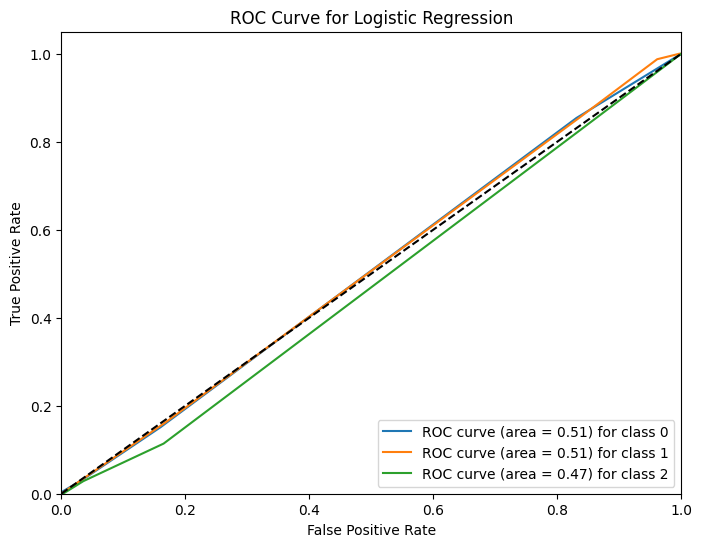

In [48]:
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])  # Adjust classes as per your data
n_classes = y_test_binarized.shape[1]

# Example for Logistic Regression (ROC Curve and AUC)
y_score_logreg = logreg.decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score_logreg[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i]:0.2f}) for class {i}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

## Project Questions:

### Comparative Analysis

- **Compare Metrics**: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.
- **Evaluate Trade-offs**: Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease of implementation, and model interpretability.
- **Justify Your Choice**: After comparing and evaluating, explain why you believe one model is the best choice. Provide a clear rationale based on the performance metrics and trade-offs discussed.
- **Feature Importance**: Identify and discuss the most important features for the best-performing model. How do these features impact the predictions? Use the visualizations you have created to justify your answer if necessary.
- **Model Limitations**: Discuss any limitations you encountered with the models you used. Are there any aspects of the data or the problem that these models do not handle well?
- **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. This could include trying different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:
The linear regression showed that 35% of variance in column 'Number_of_casualties'
The mean had high value showing its struggle with accuracy.
While the accuracy of DTC Model was around 75% and so it performed better than the Linear regression but showed overfitting on the trained data.
The SVM had high accuracy of 82% showing the highest of the rest.
and last, The KNN had 78% of accuracy but was sensitive to the choice of the number (k).
The SVM performed better than the rest in terms of accuracy.
